In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
df = pd.read_csv('./Dataset/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [58]:
print(df['Sex'].value_counts())
print(df['ChestPainType'].value_counts())
print(df['RestingECG'].value_counts())
print(df['ExerciseAngina'].value_counts())
print(df['ST_Slope'].value_counts())

Sex
M    725
F    193
Name: count, dtype: int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [59]:
### Category and sex are two categorical objects needed to convert to numerical data.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex']= le.fit_transform(df['Sex'])
df['ChestPainType']= le.fit_transform(df['ChestPainType'])
df['RestingECG']= le.fit_transform(df['RestingECG'])
df['ExerciseAngina']= le.fit_transform(df['ExerciseAngina'])
df['ST_Slope']= le.fit_transform(df['ST_Slope'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


In [60]:
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']
print(X.shape, y.shape)

(918, 11) (918,)


In [61]:
y.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=80)
y_train.value_counts()

HeartDisease
1    402
0    332
Name: count, dtype: int64

In [63]:
### Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)


print('Train acc -> ',gbc.score(X_train,y_train)*100)
print('Test acc -> ',gbc.score(X_test,y_test)*100)

Train acc ->  94.6866485013624
Test acc ->  89.67391304347827


In [67]:
# Import necessary libraries
# from sklearn.model_selection import GridSearchCV
 
# # Define the parameter grid for GridSearchCV
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
# }
 
# gb_model = GradientBoostingClassifier()
 
# grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
 
# grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

GradientBoostingClassifier(learning_rate=0.01, n_estimators=200)
0.8691361476097288


In [72]:
y_pred_abc = gbc.predict(X_test)
print(y_pred_abc)
from sklearn.metrics import confusion_matrix, classification_report,mean_absolute_error,mean_squared_error
cm_gbc = confusion_matrix(y_test, y_pred_abc)
cm_gbc

[0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1
 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1
 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0
 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1]


array([[68, 10],
       [ 9, 97]], dtype=int64)

In [74]:

print(classification_report(y_test, y_pred_abc))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88        78
           1       0.91      0.92      0.91       106

    accuracy                           0.90       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.90      0.90      0.90       184



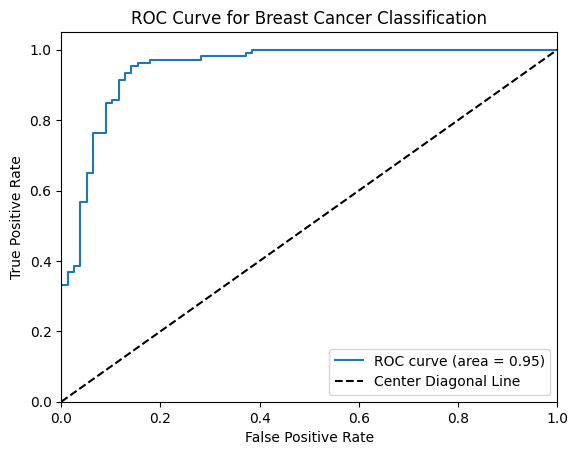

In [76]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = gbc.predict_proba(X_test)[::,1]


# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Center Diagonal Line')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Disease Classification')
plt.legend()
plt.show()

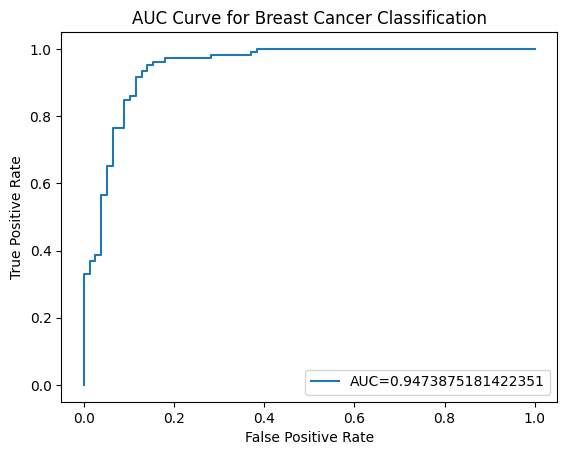

In [77]:
### AUC curve
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('AUC Curve for Heart Disease Classification')
plt.legend(loc=4)
plt.show()

Text(95.72222222222221, 0.5, 'Truth')

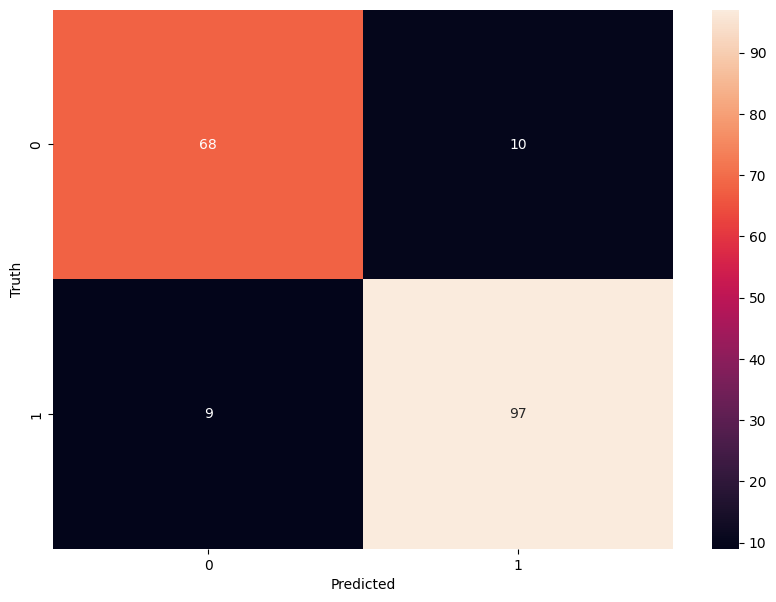

In [75]:
plt.figure(figsize=(10,7))
sns.heatmap(cm_gbc, annot=True)

plt.xlabel('Predicted')
plt.ylabel('Truth')

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred_abc)
mse = mean_squared_error(y_test, y_pred_abc)
rmse = np.sqrt(mse)
print('mae => ', mae)
print('mse => ', mse)
print('rmse => ', rmse)

mae =>  0.10326086956521739
mse =>  0.10326086956521739
rmse =>  0.32134229345857573
